In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras import datasets, layers, models


from keras.layers import Dense
from keras import datasets, layers, models
import math

from sklearn.cluster import KMeans
import tensorflow as tf
from keras import layers, datasets, models
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense



In [ ]:
df = pd.read_csv("/content/Train.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25977 entries, 0 to 28050
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       25977 non-null  int64  
 1   year     25977 non-null  int64  
 2   month    25977 non-null  int64  
 3   day      25977 non-null  int64  
 4   hour     25977 non-null  int64  
 5   PM2.5    25977 non-null  float64
 6   PM10     25968 non-null  float64
 7   SO2      25977 non-null  float64
 8   NO2      25977 non-null  float64
 9   CO       25250 non-null  float64
 10  O3       25977 non-null  float64
 11  TEMP     25977 non-null  float64
 12  PRES     25977 non-null  float64
 13  DEWP     25977 non-null  float64
 14  RAIN     25977 non-null  float64
 15  wd       25971 non-null  object 
 16  WSPM     25977 non-null  float64
 17  station  25977 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 3.8+ MB


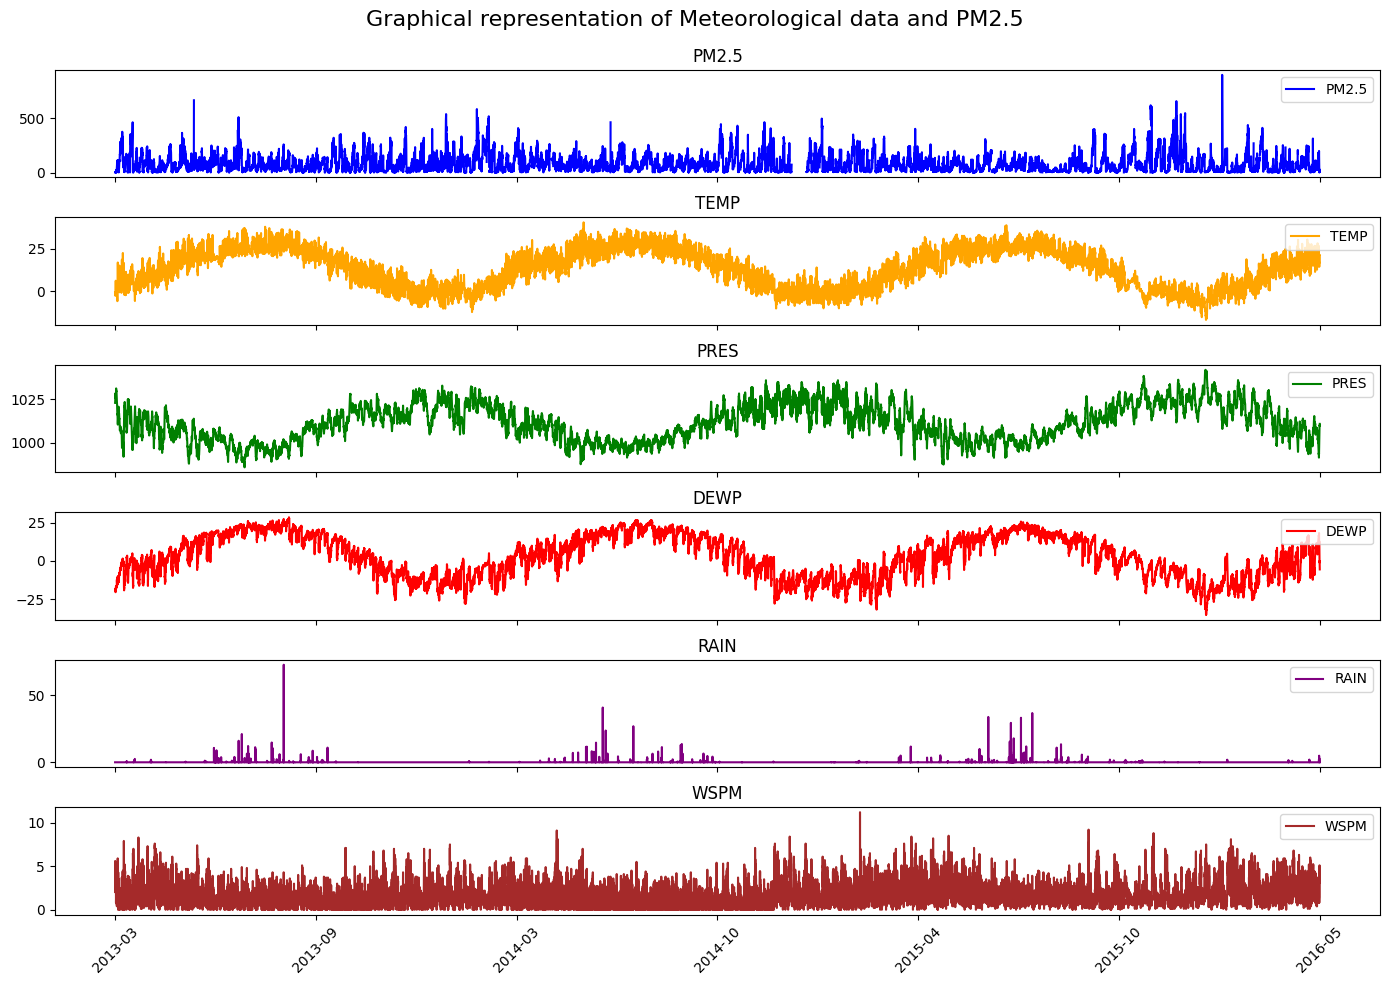

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'data' is your DataFrame with the mentioned columns

# Combine the separate date columns into a single datetime column
df['Date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Define the columns you want to plot
columns_to_plot = ['PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Define the colors for each plot
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Create subplots with shared x-axis (date)
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(14, 10), sharex=True)

# Plot each of the columns on a separate subplot
for ax, col, color in zip(axs, columns_to_plot, colors):
    ax.plot(df['Date'], df[col], label=col, color=color)
    ax.set_title(col)
    ax.legend(loc='upper right')

# Rotate the date labels to avoid overlap
plt.setp(axs, xticks=df['Date'][::len(df)//6], xticklabels=df['Date'].dt.strftime('%Y-%m')[::len(df)//6])
plt.xticks(rotation=45)

# Ensure the main title and subplots do not overlap and adjust spacing
plt.tight_layout()
plt.subplots_adjust(top=0.92)

# Add a main title above all subplots
fig.suptitle('Graphical representation of Meteorological data and PM2.5', fontsize=16)


# Show the plot
plt.show()


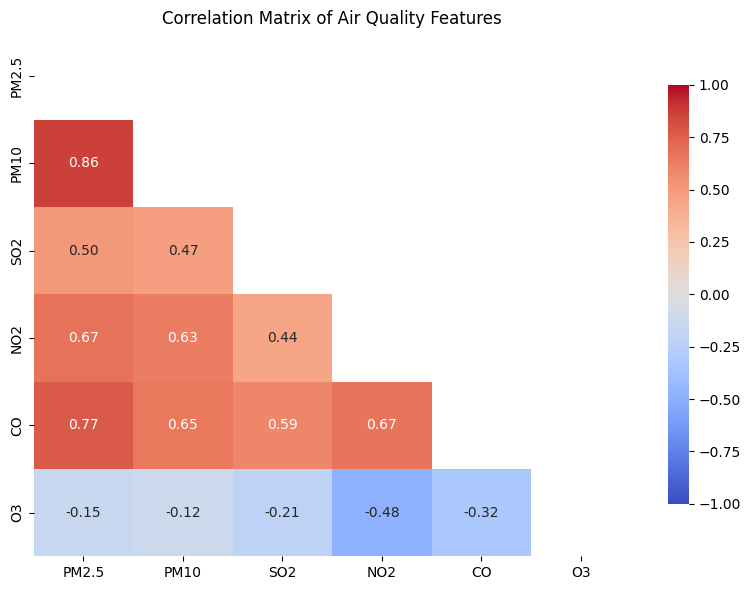

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your pandas DataFrame and it contains the relevant columns
# For example: data = pd.read_csv('your_file.csv')

# Calculate the correlation matrix
corr = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()

# Create a mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            vmin=-1, vmax=1, cbar_kws={"shrink": .8})

# Add title
plt.title('Correlation Matrix of Air Quality Features')

# Adjust layout to fit
plt.tight_layout()


# Show the plot
plt.show()


In [ ]:
# df.dropna(subset=['PM2.5'], inplace=True)
features = ['PM2.5', 'TEMP', 'NO2', 'SO2', 'DEWP', 'O3', 'WSPM', 'RAIN']
df.dropna(subset=features, inplace=True)

In [ ]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [ ]:
# Assuming 'df' is your DataFrame containing the dataset
# Selecting the specified features: PM2.5, TEMP, NO2, SO2, DEWP, O3, WSPM, RAIN
# Adjust the column indices according to your DataFrame structure
features_columns = ['PM2.5', 'TEMP', 'NO2', 'SO2', 'DEWP', 'O3', 'WSPM', 'RAIN']  # Use the actual column names from your DataFrame

# Select all rows for these features
training_set = df[features_columns].values

# Check the length of the training_set
length_of_training_set = len(training_set)
print(length_of_training_set)


25977


In [ ]:
training_set = training_set[-5000:]

**Feature Scaling**

In [ ]:
# normalize your data for BiGRU
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
lag = 48  # Number of hours to use as input to predict the next hour
n_obs = 5000  # Adjust this if needed based on your dataset size after preprocessing
features = 8  # Total number of features included

X_train = []
y_train = []

# Ensure you're selecting all features for X_train and only the PM2.5 values for y_train
for i in range(lag, n_obs):
    X_train.append(training_set_scaled[i-lag:i, :])  # Include all features in the lagged window
    y_train.append(training_set_scaled[i, 0])  # Assuming PM2.5 is the first feature for prediction

# Convert lists to numpy arrays for training the BiGRU
X_train, y_train = np.array(X_train), np.array(y_train)

# Now, X_train should have the shape [samples, timesteps, features]
print(X_train.shape)  # Expected shape: (number of samples, lag, features)



(4952, 48, 8)


In [ ]:
X_train.shape

(4952, 48, 8)

# **BI GRU**

**With Tuning Hyperparameters**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Adding the first Bidirectional GRU layer with optimized units and dropout
model.add(Bidirectional(GRU(units=200, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))  # Applying optimized dropout of 20%

# Adding a second Bidirectional GRU layer with optimized units and dropout
model.add(Bidirectional(GRU(units=100, return_sequences=True)))
model.add(Dropout(rate=0.2))  # Applying optimized dropout of 20%

# Adding the third Bidirectional GRU layer with optimized units and dropout
# Since this is the final GRU layer before the Dense layer, return_sequences is set to False (which is default)
model.add(Bidirectional(GRU(units=100)))
model.add(Dropout(rate=0.2))  # Applying optimized dropout of 20%

# Adding the output layer
model.add(Dense(units=1))

In [ ]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_10 (Bidirect  (None, 48, 400)           252000    
 ional)                                                          
                                                                 
 dropout_9 (Dropout)         (None, 48, 400)           0         
                                                                 
 bidirectional_11 (Bidirect  (None, 48, 200)           301200    
 ional)                                                          
                                                                 
 dropout_10 (Dropout)        (None, 48, 200)           0         
                                                                 
 bidirectional_12 (Bidirect  (None, 200)               181200    
 ional)                                                          
                                                      

Fitting the BI GRU to the Training set

In [ ]:
# Compiling the BiGRU
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
155/155 [==============================] - 90s 500ms/step - loss: 0.0069
Epoch 2/50
155/155 [==============================] - 77s 496ms/step - loss: 0.0018
Epoch 3/50
155/155 [==============================] - 79s 509ms/step - loss: 0.0014
Epoch 4/50
155/155 [==============================] - 77s 496ms/step - loss: 0.0013
Epoch 5/50
155/155 [==============================] - 74s 478ms/step - loss: 0.0013
Epoch 6/50
155/155 [==============================] - 74s 474ms/step - loss: 0.0013
Epoch 7/50
155/155 [==============================] - 74s 475ms/step - loss: 0.0013
Epoch 8/50
155/155 [==============================] - 73s 471ms/step - loss: 0.0012
Epoch 9/50
155/155 [==============================] - 75s 484ms/step - loss: 9.9611e-04
Epoch 10/50
155/155 [==============================] - 75s 487ms/step - loss: 0.0010
Epoch 11/50
155/155 [==============================] - 77s 499ms/step - loss: 9.8882e-04
Epoch 12/50
155/155 [==============================] - 79s 509ms/s

Making the predictions and visualising the results

In [ ]:
# Assuming 'sc' is your MinMaxScaler fitted on the training data
# And 'dataset_test' is your raw test dataset loaded from '/content/Test.csv'

# Load the test dataset (already done)
dataset_test = pd.read_csv('/content/Test.csv')

# Drop rows with NaN values in any of the columns you're using
dataset_test.dropna(subset=['PM2.5', 'TEMP', 'NO2', 'SO2', 'DEWP', 'O3', 'WSPM', 'RAIN'], inplace=True)

# Scale the test data using the same scaler as the training data
# Make sure to select the same features in the same order as the training set
test_features = dataset_test[['PM2.5', 'TEMP', 'NO2', 'SO2', 'DEWP', 'O3', 'WSPM', 'RAIN']].values
test_features_scaled = sc.transform(test_features)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)

# Reshape X_test if necessary (it might already be in the correct shape)
# X_test should now be shaped [samples, timesteps, features]
# No need to reshape based on the previous step since it already considers all features

# Make predictions
pred_PM2 = model.predict(X_test)

# Depending on your model's output, you might need to inverse scale the predictions
# If you scaled your target variable (PM2.5) during training


207/207 [==============================] - 35s 159ms/step


In [ ]:
# pred_PM2 = model.predict(X_test)
pred_PM2

array([[0.0525557 ],
       [0.05108076],
       [0.04895401],
       ...,
       [0.01530063],
       [0.02266369],
       [0.0274056 ]], dtype=float32)

In [ ]:
# Assume pred_PM2 is your predictions with shape (num_samples, 1)
# Create an array with the same number of columns as the original scaled data
pred_full = np.zeros((pred_PM2.shape[0], 8))  # 8 for the number of features you have

# Assuming PM2.5 is the first column, fill in your predictions there
pred_full[:, 0] = pred_PM2.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the PM2.5 predictions after inverse transforming
pred_PM2_inverse = pred_full_inverse[:, 0]



In [ ]:
# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_PM2 = dataset_test['PM2.5'].values[-len(pred_PM2):]  # Make sure to align the lengths

# Ensure real_PM2 is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching pred_PM2_inverse in length)
real_PM2 = real_PM2.reshape(-1, 1)  # Only needed if real_PM2 isn't already a 1D array

# Now proceed with RMSE calculation
RMSE = np.sqrt(np.mean((pred_PM2_inverse - real_PM2.ravel())**2))  # Use ravel() to ensure it's 1D for calculation
print("RMSE:", RMSE)


RMSE: 19.4580009549425


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_PM2, pred_PM2_inverse))

# Calculate MAE
mae = mean_absolute_error(real_PM2, pred_PM2_inverse)

# Calculate MSE
mse = mean_squared_error(real_PM2, pred_PM2_inverse)

# Calculate MAPE - Note: You have to ensure real_PM2 does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_PM2 - pred_PM2_inverse) / real_PM2)) * 100

# Calculate R-squared
r2 = r2_score(real_PM2, pred_PM2_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MSE: {:.4f}'.format(mse))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 19.4580
MAE: 11.4710
MSE: 378.6138
MAPE: 285.0620%
R-squared: 0.9474


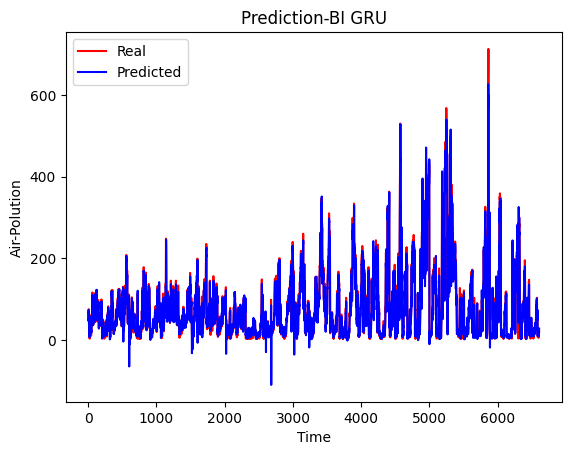

In [ ]:
plt.plot(real_PM2, color = 'red', label = 'Real')
plt.plot(pred_PM2_inverse, color = 'blue', label = 'Predicted')
plt.title('Prediction-BI GRU')
plt.xlabel('Time')
plt.ylabel('Air-Polution')
plt.legend()
plt.show()

Variable importance

In [ ]:
!pip install pydot graphviz



In [ ]:
sudo apt-get install graphviz


SyntaxError: invalid syntax (<ipython-input-11-ed26e7b4d7d8>, line 1)

In [ ]:
from tensorflow.keras.utils import plot_model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dropout, Dense

model = Sequential([
    Bidirectional(GRU(units=200, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(rate=0.2),
    Bidirectional(GRU(units=100, return_sequences=True)),
    Dropout(rate=0.2),
    Bidirectional(GRU(units=100)),
    Dropout(rate=0.2),
    Dense(units=1)
])


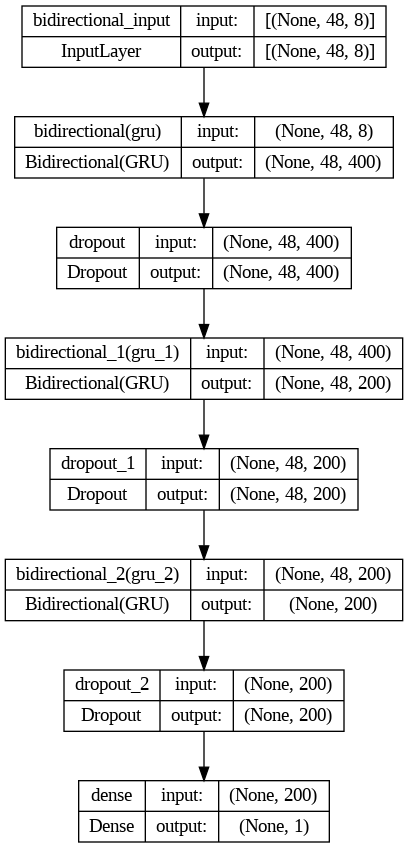

In [ ]:
plot_model(model, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)


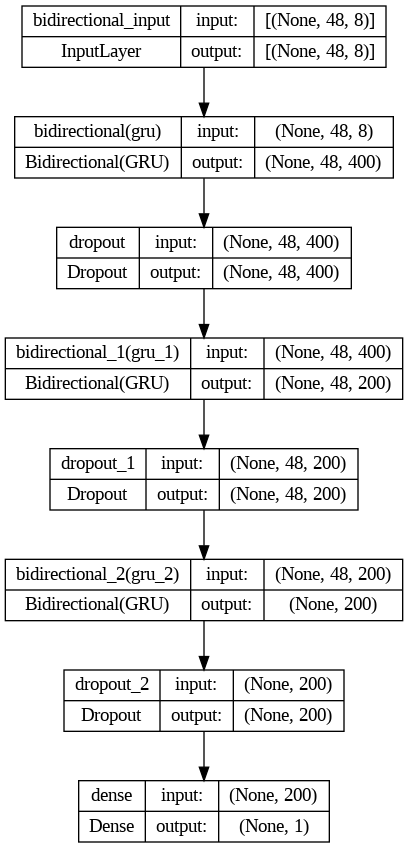

In [ ]:
from IPython.display import Image
Image('model_diagram.png')


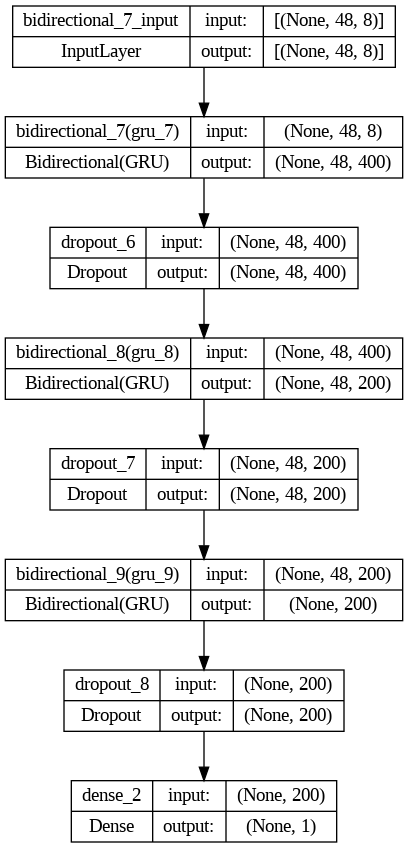

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dropout, Dense
from tensorflow.keras.utils import plot_model

# Correct input shape (excluding batch size, including only the time steps and features)
input_shape = (48, 8)

model = Sequential()
model.add(Bidirectional(GRU(units=200, return_sequences=True), input_shape=input_shape))
model.add(Dropout(rate=0.2))
model.add(Bidirectional(GRU(units=100, return_sequences=True)))
model.add(Dropout(rate=0.2))
model.add(Bidirectional(GRU(units=100)))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1))

# Generate a plot of the model
plot_model(model, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)

# Display the image in Jupyter Notebook
from IPython.display import Image
Image(filename='model_diagram.png')



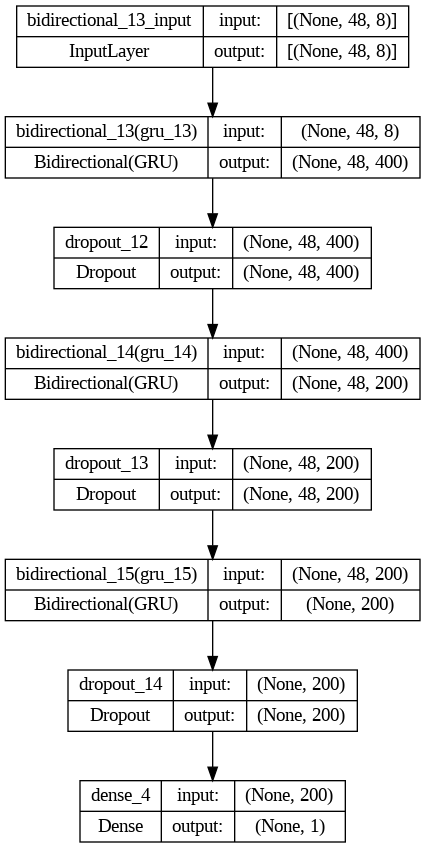

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dropout, Dense
from tensorflow.keras.utils import plot_model

# Define the model
model = Sequential([
    Bidirectional(GRU(units=200, return_sequences=True), input_shape=(48, 8)),
    Dropout(rate=0.2),
    Bidirectional(GRU(units=100, return_sequences=True)),
    Dropout(rate=0.2),
    Bidirectional(GRU(units=100)),
    Dropout(rate=0.2),
    Dense(units=1)
])

# Plot the model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


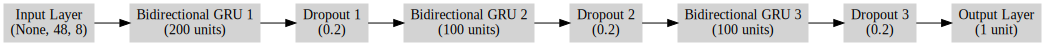

In [ ]:
from graphviz import Digraph

# Initialize Digraph object
dot = Digraph('BiGRU_Network', format='png')

# Define custom styles for the graph
dot.attr(rankdir='LR')  # Left to right graph
dot.attr('node', shape='box', style='filled', color='lightgrey')

# Add nodes with the layer details
dot.node('I', 'Input Layer\n(None, 48, 8)')
dot.node('B1', 'Bidirectional GRU 1\n(200 units)')
dot.node('D1', 'Dropout 1\n(0.2)')
dot.node('B2', 'Bidirectional GRU 2\n(100 units)')
dot.node('D2', 'Dropout 2\n(0.2)')
dot.node('B3', 'Bidirectional GRU 3\n(100 units)')
dot.node('D3', 'Dropout 3\n(0.2)')
dot.node('O', 'Output Layer\n(1 unit)')

# Add edges between the nodes to show the flow of the model
edges = [
    ('I', 'B1'), ('B1', 'D1'),
    ('D1', 'B2'), ('B2', 'D2'),
    ('D2', 'B3'), ('B3', 'D3'),
    ('D3', 'O')
]
dot.edges(edges)

# Render the graph to a file and optionally display it
dot.render('network_diagram', view=True)

# If you're in a Jupyter environment, display the graph in the notebook
dot



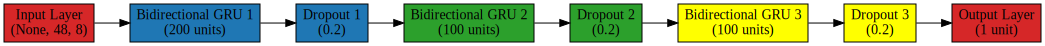

In [ ]:
from graphviz import Digraph

# Initialize Digraph object
dot = Digraph('BiGRU_Network', format='png')

# Define custom styles for the graph
dot.attr(rankdir='LR')  # Left to right graph
dot.attr('node', shape='box', style='filled')

# Add nodes with the layer details and unique colors for each layer
dot.node('I', 'Input Layer\n(None, 48, 8)', fillcolor='#d62728')
dot.node('B1', 'Bidirectional GRU 1\n(200 units)', fillcolor='#1f77b4')
dot.node('D1', 'Dropout 1\n(0.2)', fillcolor='#1f77b4')
dot.node('B2', 'Bidirectional GRU 2\n(100 units)', fillcolor='#2ca02c')
dot.node('D2', 'Dropout 2\n(0.2)', fillcolor='#2ca02c')
dot.node('B3', 'Bidirectional GRU 3\n(100 units)', fillcolor='#FFFF00')
dot.node('D3', 'Dropout 3\n(0.2)', fillcolor='#FFFF00')
dot.node('O', 'Output Layer\n(1 unit)', fillcolor='#d62728')

# Add edges between the nodes to show the flow of the model
dot.edge('I', 'B1')
dot.edge('B1', 'D1')
dot.edge('D1', 'B2')
dot.edge('B2', 'D2')
dot.edge('D2', 'B3')
dot.edge('B3', 'D3')
dot.edge('D3', 'O')

# Save and render the graph to a .png file
dot.render('colorful_bi_gru_network_graph')

dot
